# Задание.

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [99]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# import some data to play with
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [109]:
data = pd.DataFrame(iris.data[:, :2], columns=iris.feature_names[:2])
data_class = iris.target
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [117]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2)

In [75]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [76]:
lda = LinearDiscriminantAnalysis()

In [77]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [78]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [79]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0,
       1, 1, 2, 2, 1, 0, 1, 2])

In [80]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

result

,0,1
0,2,2
1,1,2
2,0,0
3,1,1
4,0,0
5,2,1
6,0,0
7,0,0
8,2,2
9,0,0


In [94]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8333333333333334

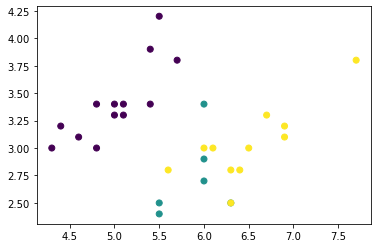

In [95]:
# Визуализируем предсказания для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.show()

<ipython-input-106-890ee0ed0f60>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='RdBu',


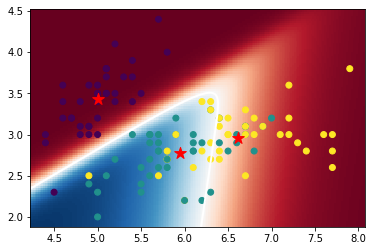

In [106]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='RdBu',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [114]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [119]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X_train)

In [124]:
from sklearn.cluster import KMeans
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1,
       2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2,
       1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 2, 2, 0])

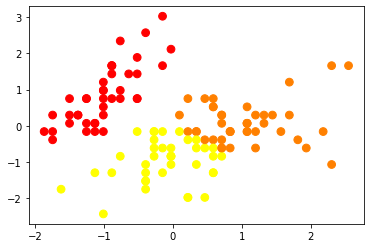

In [125]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [135]:
# строим график локтя

# создаем список для инерции
k_inertia = []

# задаем диапазон кластеров
ks = range(1, 10)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)



C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


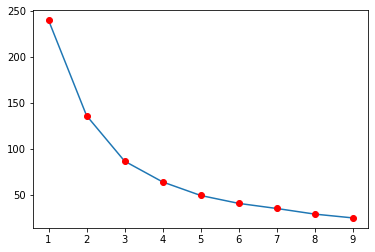

In [136]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

# по графику локтя можем сделать вывод что оптимальное количество кластеров равно 3